In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.word2vec import PathLineSentences, LineSentence, Word2Vec
from pathlib import Path
import networkx as nx
from sklearn import model_selection, linear_model, preprocessing, svm
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
%matplotlib inline


**Load random walks from output files**

The word2vec model requires sentences of strings, so we convert node number to a string.

In [2]:
G = nx.read_edgelist("/Users/Ganymedian/Desktop/dynamic-rw/datasets/karate.txt", nodetype=int)
A = nx.adjacency_matrix(G,nodelist=sorted(G.nodes())).toarray()
d_w = A.sum(axis=1)
M_theory = A.T / d_w

In [1]:
def read_edgelist(fname):
    d = {}
    e_id = 0
    with open(fname) as f:
        for line in f:
           (src, dst) = line.split("\t")
           d[(int(src),int(dst))] = e_id
           e_id = e_id + 1
           d[(int(dst),int(src))] = e_id
           e_id = e_id + 1
    return d
        

In [3]:
def read_walks(m, v, wl, nw):
    fname = "ar-" + m + "-wl" + str(wl) + "-nw" + str(nw) + "-" + v
    rws = np.concatenate([
        np.loadtxt(f.open(), delimiter='\t', dtype=int)
        for f in rw_location.glob(fname + "-*.txt")
        if f.stat().st_size > 0
    ])
    ars = np.vsplit(rws, 5)
    return ars

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]
m1
m2
m3
m4


<function matplotlib.pyplot.show>

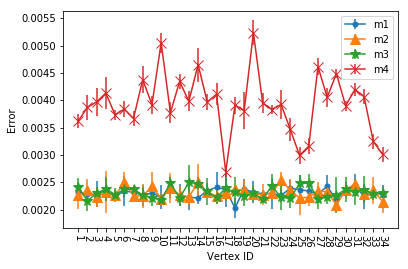

In [4]:
methods = ["m1", "m2", "m3", "m4"]
nmethods = len(methods)
num_runs = 5
wl = 3
nw = 100
rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/output/karate-2nd")
formats=['.-', '^-', '*-','x-']
n_nodes = G.number_of_nodes()
vertices = np.arange(1,n_nodes+1)
print(vertices)

for mm in range(nmethods):
    print(methods[mm])
    all_errors = []
    for vv in vertices:
        v = "v"+str(vv)
        runs = read_walks(methods[mm], v, wl, nw)
        errors = []
        for rr in range(num_runs):
            M_empirical = np.zeros((n_nodes, n_nodes))
            for walk in runs[rr]:
                for kk in range(wl - 1):
                    M_empirical[walk[kk] - 1, walk[kk + 1] - 1] += 1

            n_samples = M_empirical.sum()
            M_empirical = M_empirical.T / np.maximum(M_empirical.sum(axis=1), 1)

            errors.append(np.abs(M_theory - M_empirical).mean())

        all_errors.append(errors)

    means = np.mean(all_errors,axis=1)
    stdv = np.std(all_errors, axis=1)
    plt.errorbar(vertices, means, yerr=stdv, fmt=formats[mm], label=methods[mm], ms=10)
    plt.xticks(vertices, rotation=-90)
    plt.legend()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel("Vertex ID")
plt.ylabel("Error")
plt.show